In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [3]:
data = pd.read_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\daily_data.csv")

In [4]:
data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_id                    2893 non-null   object 
 1   city_id                   2893 non-null   object 
 2   temperature_celsius       2893 non-null   float64
 3   condition_text            479 non-null    object 
 4   wind_kph                  2893 non-null   float64
 5   wind_degree               2893 non-null   int64  
 6   pressure_mb               2893 non-null   float64
 7   precip_mm                 2893 non-null   float64
 8   humidity                  2893 non-null   int64  
 9   cloud                     2893 non-null   int64  
 10  feels_like_celsius        2893 non-null   float64
 11  visibility_km             2893 non-null   float64
 12  uv_index                  2893 non-null   float64
 13  gust_kph                  2893 non-null   float64
 14  air_qual

In [6]:
data.isnull().sum()

day_id                         0
city_id                        0
temperature_celsius            0
condition_text              2414
wind_kph                       0
wind_degree                    0
pressure_mb                    0
precip_mm                      0
humidity                       0
cloud                          0
feels_like_celsius             0
visibility_km                  0
uv_index                       0
gust_kph                       0
air_quality_us-epa-index       0
sunrise                        0
sunset                         0
dtype: int64

In [7]:
data.describe()

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,22.024577,10.304805,158.994469,1013.745938,0.165299,74.773591,32.073280,23.725752,9.745524,2.216730,16.930522,1.599032
std,6.615540,7.264472,103.021634,6.172045,0.937061,19.335724,32.584184,8.877424,2.489918,2.238163,10.541449,1.062513
min,-2.000000,3.600000,1.000000,982.000000,0.000000,4.000000,0.000000,-4.300000,0.000000,1.000000,0.700000,1.000000
25%,17.000000,5.000000,70.000000,1010.000000,0.000000,66.000000,0.000000,17.000000,10.000000,1.000000,9.000000,1.000000
50%,22.000000,8.300000,150.000000,1014.000000,0.000000,78.000000,25.000000,24.500000,10.000000,1.000000,15.100000,1.000000
75%,27.000000,13.000000,236.000000,1018.000000,0.000000,89.000000,68.000000,30.000000,10.000000,1.000000,22.300000,2.000000
max,45.000000,74.200000,360.000000,1036.000000,28.700000,100.000000,100.000000,73.600000,32.000000,10.000000,75.600000,6.000000


In [8]:
data.describe(include=['O'])

,day_id,city_id,condition_text,sunrise,sunset
count,2893,2893,479,2893,2893
unique,2893,112,9,168,198
top,D0001,C001,Clear and Sunny,06:21 AM,06:03 PM
freq,1,26,122,65,53


In [9]:
data.city_id.unique()

array(['C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008',
       'C009', 'C010', 'C011', 'C012', 'C013', 'C014', 'C015', 'C016',
       'C019', 'C017', 'C018', 'C020', 'C021', 'C022', 'C023', 'C024',
       'C025', 'C026', 'C027', 'C028', 'C029', 'C030', 'C031', 'C032',
       'C033', 'C034', 'C035', 'C036', 'C037', 'C038', 'C039', 'C040',
       'C041', 'C042', 'C043', 'C044', 'C045', 'C046', 'C047', 'C048',
       'C049', 'C050', 'C051', 'C052', 'C053', 'C054', 'C055', 'C057',
       'C058', 'C059', 'C060', 'C061', 'C062', 'C063', 'C064', 'C065',
       'C066', 'C067', 'C068', 'C069', 'C070', 'C071', 'C072', 'C056',
       'C073', 'C074', 'C075', 'C076', 'C077', 'C078', 'C079', 'C080',
       'C081', 'C082', 'C083', 'C084', 'C085', 'C086', 'C087', 'C088',
       'C089', 'C090', 'C091', 'C092', 'C093', 'C094', 'C095', 'C096',
       'C097', 'C098', 'C099', 'C100', 'C101', 'C102', 'C103', 'C104',
       'C105', 'C106', 'C107', 'C108', 'C109', 'C110', 'C111', 'C112'],
     

In [10]:
def convert_to_minutes(time_str):
    time_obj = pd.to_datetime(time_str, format='%I:%M %p')
    return time_obj.hour * 60 + time_obj.minute

data['sunrise_mint'] = data['sunrise'].apply(convert_to_minutes)
data['sunset_mint'] = data['sunset'].apply(convert_to_minutes)

data[['hour_min_sunrise', 'period_sunrise']] = data['sunrise'].str.split(' ', expand=True)
data[['hour_sunrise', 'minute_sunrise']] = data['hour_min_sunrise'].str.split(':', expand=True)
data = data.drop(columns=['hour_min_sunrise', 'sunrise'])
data['hour_sunrise'] = data['hour_sunrise'].astype(int)
data['minute_sunrise'] = data['minute_sunrise'].astype(int)

data[['hour_min_sunset', 'period_sunset']] = data['sunset'].str.split(' ', expand=True)
data[['hour_sunset', 'minute_sunset']] = data['hour_min_sunset'].str.split(':', expand=True)
data = data.drop(columns=['hour_min_sunset', 'sunset'])
data['hour_sunset'] = data['hour_sunset'].astype(int)
data['minute_sunset'] = data['minute_sunset'].astype(int)

data['city_id'] = [int(code[1:]) for code in data['city_id']]

data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,...,gust_kph,air_quality_us-epa-index,sunrise_mint,sunset_mint,period_sunrise,hour_sunrise,minute_sunrise,period_sunset,hour_sunset,minute_sunset
0,D0001,1,27.0,NaN,6.1,210,1006.0,0.0,54,75,...,11.9,2,364,1159,AM,6,4,PM,7,19
1,D0002,1,22.0,NaN,6.1,170,1006.0,0.0,73,75,...,23.4,1,365,1158,AM,6,5,PM,7,18
2,D0003,1,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,...,12.6,1,365,1158,AM,6,5,PM,7,18
3,D0004,1,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,...,11.2,1,366,1156,AM,6,6,PM,7,16
4,D0005,1,18.0,NaN,3.6,92,1019.0,0.0,94,0,...,9.0,1,367,1155,AM,6,7,PM,7,15


In [11]:
data['temperature_difference'] = data['temperature_celsius'] - data['feels_like_celsius']

data['wind_u'] = data['wind_kph'] * np.cos(np.radians(data['wind_degree']))
data['wind_v'] = data['wind_kph'] * np.sin(np.radians(data['wind_degree']))

data['wind_gust_ratio'] = data['gust_kph'] / data['wind_kph']

data['humidity_cloud_interaction'] = np.log(data['humidity'] * data['cloud'])
data['humidity_cloud_interaction'] = data['humidity_cloud_interaction'].replace([np.inf, -np.inf, np.nan], 0)


data['day_length'] = data['sunset_mint'] - data['sunrise_mint']
mean_day_length = data.groupby('city_id')['day_length'].transform('mean')
data['day_length'] = data['day_length'] / mean_day_length

data['sunrise_mint'] = data['sunrise_mint'] / 1440
data['sunset_mint'] = data['sunset_mint'] / 1440

def comfort_index(T, RH, wind_speed):
    return (T - 0.55 * (1 - RH/100) * (T - 14.5)) - (0.6 * wind_speed)

data['comfort_index'] = data.apply(lambda row: comfort_index(row['temperature_celsius'], row['humidity'], row['wind_kph']), axis=1)

def calculate_dew_point(temp, humidity):
    a = 17.27
    b = 237.7
    alpha = ((a * temp) / (b + temp)) + np.log(humidity / 100.0)
    dew_point = (b * alpha) / (a - alpha)
    return dew_point

data['dew_point'] = data.apply(lambda row: calculate_dew_point(row['temperature_celsius'], row['humidity']), axis=1)

def calculate_wind_chill(temp, wind_speed):
    wind_chill = 13.12 + 0.6215 * temp - 11.37 * (wind_speed ** 0.16) + 0.3965 * temp * (wind_speed ** 0.16)
    return wind_chill

data['wind_chill'] = data.apply(lambda row: calculate_wind_chill(row['temperature_celsius'], row['wind_kph']), axis=1)

mean_pressure = data.groupby('city_id')['pressure_mb'].transform('mean')
data['pressure_mean'] = (data['pressure_mb'] - mean_pressure) / mean_pressure

data['cumulative_precip'] = data['precip_mm'].rolling(window=7, min_periods=1).sum()
data['precip_frequency'] = data['precip_mm'].rolling(window=7, min_periods=1).apply(lambda x: (x > 0).sum(), raw=True)

def cloud_cover_bin(cloud):
    if cloud < 20:
        return 'clear'
    elif cloud < 50:
        return 'partly cloudy'
    else:
        return 'overcast'

data['cloud_cover_bin'] = data['cloud'].apply(cloud_cover_bin)

city_avg_temp = data.groupby('city_id')['temperature_celsius'].transform('mean')
data['avg_temperature'] = city_avg_temp
data['temperature_deviation'] = data['temperature_celsius'] - city_avg_temp

def wind_speed_category(wind_kph):
    if wind_kph < 20:
        return 'light'
    elif wind_kph < 40:
        return 'moderate'
    else:
        return 'strong'

data['wind_speed_category'] = data['wind_kph'].apply(wind_speed_category)

def wind_direction(degree):
    if degree >= 337.5 or degree < 22.5:
        return 'N'
    elif degree < 67.5:
        return 'NE'
    elif degree < 112.5:
        return 'E'
    elif degree < 157.5:
        return 'SE'
    elif degree < 202.5:
        return 'S'
    elif degree < 247.5:
        return 'SW'
    elif degree < 292.5:
        return 'W'
    else:
        return 'NW'
data['wind_direction_category'] = data['wind_degree'].apply(wind_direction)

data['temp_humidity_interaction'] = np.log(data['temperature_celsius'] * data['humidity'])
city_avg_temp_humidity = data.groupby('city_id')['temp_humidity_interaction'].transform('mean')
data['temp_humidity_interaction'] = data['temp_humidity_interaction'] / city_avg_temp_humidity

data['wind_temp_interaction'] = data['wind_kph'] * data['temperature_celsius']

city_avg_visibility = data.groupby('city_id')['visibility_km'].transform('mean')
data['normalized_visibility'] = (data['visibility_km'] - city_avg_visibility) / city_avg_visibility

def wind_chill_severity(wind_chill):
    if wind_chill < 0:
        return 1
    elif wind_chill < 10:
        return 2
    else:
        return 3
data['wind_chill_severity'] = data['wind_chill'].apply(wind_chill_severity)

def calculate_heat_index(temp, humidity):
    return -8.78469475556 + 1.61139411*temp + 2.33854883889*humidity - 0.14611605*temp*humidity - 0.012308094*temp**2 - 0.0164248277778*humidity**2 + 0.002211732*temp**2*humidity + 0.00072546*temp*humidity**2 - 0.000003582*temp**2*humidity**2
data['heat_index'] = data.apply(lambda row: calculate_heat_index(row['temperature_celsius'], row['humidity']), axis=1)

data['wind_power'] = data['wind_kph'] ** 3

city_avg_humidity = data.groupby('city_id')['humidity'].transform('mean')
data['humidity_deviation'] = (data['humidity'] - city_avg_humidity) / city_avg_humidity

def rain_intensity(precip_mm):
    if precip_mm == 0:
        return 1
    elif precip_mm < 2.5:
        return 2
    elif precip_mm < 7.6:
        return 3
    else:
        return 4
data['rain_intensity'] = data['precip_mm'].apply(rain_intensity)


def uv_risk(uv_index):
    if uv_index < 3:
        return 1
    elif uv_index < 6:
        return 2
    elif uv_index < 8:
        return 3
    elif uv_index < 11:
        return 4
    else:
        return 5
data['uv_risk'] = data['uv_index'].apply(uv_risk)

def visibility_reduction(precip_mm, cloud_cover):
    return float(max(0, 10 - (precip_mm * 2 + cloud_cover * 0.1)))
data['visibility_reduction'] = data.apply(lambda row: visibility_reduction(row['precip_mm'], row['cloud']), axis=1)


def solar_radiation(uv_index, cloud_cover):
    peak_radiation = uv_index * 25 
    return peak_radiation * 0.7 * (1 - cloud_cover / 100)

data['solar_radiation_w/m2'] = data.apply(lambda row: solar_radiation(row['uv_index'], row['cloud']), axis=1)

c:\Users\Predator\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Predator\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Predator\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
data.temp_humidity_interaction.unique()

array([0.99052042, 1.00366618, 1.03349817, ..., 0.98992789, 1.03274029,
       0.9850787 ])

In [13]:
data.humidity_cloud_interaction.unique()

array([8.30647216, 8.60794755, 8.9226583 , 0.        , 8.51719319,
       8.28778003, 8.16763572, 7.7186855 , 9.14846497, 8.73632872,
       8.45531779, 6.62007321, 7.50933527, 7.57558465, 7.27931884,
       8.28147086, 7.63771643, 8.26873183, 8.33086361, 7.98956045,
       8.56598336, 5.99146455, 8.50714286, 8.68693597, 8.8607829 ,
       8.38935982, 8.55159462, 7.76217061, 8.79482493, 7.39326309,
       7.69621264, 8.22951112, 7.53636394, 7.52294092, 7.40853057,
       8.49658224, 7.46737107, 7.64969262, 7.29641327, 8.16051825,
       8.66129354, 7.62559507, 6.47697236, 7.45298233, 7.95472333,
       7.42356844, 8.3248213 , 9.0710783 , 8.03915739, 8.72420736,
       7.56268125, 7.26192709, 7.43838353, 8.19973896, 6.41345896,
       7.58069975, 8.78874588, 7.74932246, 8.65869275, 8.27435701,
       8.27792026, 8.49637805, 9.05951748, 9.13776968, 8.4038005 ,
       7.99799932, 8.97613587, 8.90869459, 8.2839993 , 8.61141187,
       8.63799389, 7.74673291, 8.81284343, 8.83637393, 8.88930

<AxesSubplot: >

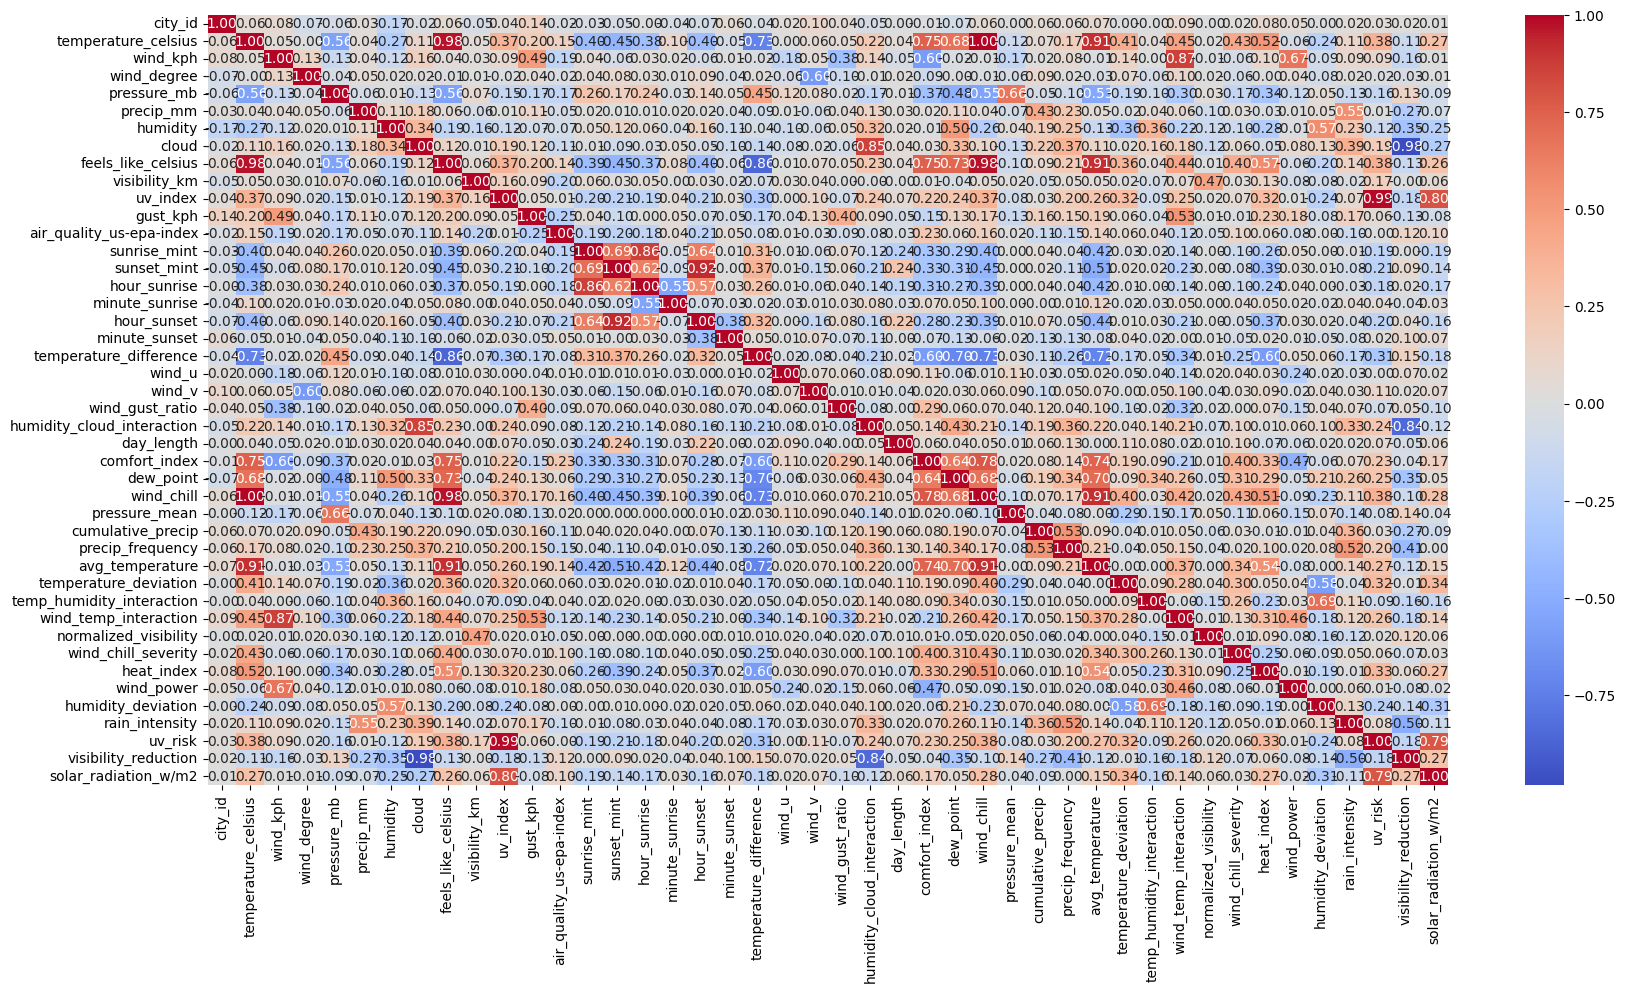

In [14]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [15]:
data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,...,wind_temp_interaction,normalized_visibility,wind_chill_severity,heat_index,wind_power,humidity_deviation,rain_intensity,uv_risk,visibility_reduction,solar_radiation_w/m2
0,D0001,1,27.0,NaN,6.1,210,1006.0,0.0,54,75,...,164.7,0.007752,3,27.669456,226.981,-0.323373,1,3,2.5,26.250
1,D0002,1,22.0,NaN,6.1,170,1006.0,0.0,73,75,...,134.2,0.007752,3,23.190211,226.981,-0.085301,1,1,2.5,4.375
2,D0003,1,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,...,72.0,0.007752,3,15.127736,46.656,0.253012,3,1,0.0,4.375
3,D0004,1,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,...,103.7,0.007752,3,18.798340,226.981,0.102651,1,1,10.0,17.500
4,D0005,1,18.0,NaN,3.6,92,1019.0,0.0,94,0,...,64.8,0.007752,3,16.186726,46.656,0.177831,1,1,10.0,17.500


In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   day_id                      2893 non-null   object 
 1   city_id                     2893 non-null   int64  
 2   temperature_celsius         2893 non-null   float64
 3   condition_text              479 non-null    object 
 4   wind_kph                    2893 non-null   float64
 5   wind_degree                 2893 non-null   int64  
 6   pressure_mb                 2893 non-null   float64
 7   precip_mm                   2893 non-null   float64
 8   humidity                    2893 non-null   int64  
 9   cloud                       2893 non-null   int64  
 10  feels_like_celsius          2893 non-null   float64
 11  visibility_km               2893 non-null   float64
 12  uv_index                    2893 non-null   float64
 13  gust_kph                    2893 

In [17]:
object_cols = [col for col in data.columns if data[col].dtype == "object"]
object_nunique = list(map(lambda col: data[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))
sorted(d.items(), key=lambda x: x[1])

[('period_sunrise', 1),
 ('period_sunset', 1),
 ('cloud_cover_bin', 3),
 ('wind_speed_category', 3),
 ('wind_direction_category', 8),
 ('condition_text', 9),
 ('day_id', 2893)]

In [18]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [19]:
ode_cols = ['wind_direction_category']
ohe_cols = ['cloud_cover_bin', 'wind_speed_category']

In [20]:
train_data = data[data['condition_text'].notnull()]
test_data = data[data['condition_text'].isnull()]

In [21]:
train_data.loc[:, 'condition_text'] = train_data['condition_text'].replace({
    'Clear and Sunny': 0.0,
    'Partly Cloudy': 1.0,
    'Light Precipitation': 2.0,
    'Cloudy and Overcast': 3.0,
    'Mist or Fog': 4.0,
    'Rain Showers': 5.0,
    'Light Rain with Thunder': 6.0,
    'Thunderstorms': 7.0,
    'Moderate to Heavy Rain': 8.0,
})

In [22]:
train_data.columns

Index(['day_id', 'city_id', 'temperature_celsius', 'condition_text',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
       'air_quality_us-epa-index', 'sunrise_mint', 'sunset_mint',
       'period_sunrise', 'hour_sunrise', 'minute_sunrise', 'period_sunset',
       'hour_sunset', 'minute_sunset', 'temperature_difference', 'wind_u',
       'wind_v', 'wind_gust_ratio', 'humidity_cloud_interaction', 'day_length',
       'comfort_index', 'dew_point', 'wind_chill', 'pressure_mean',
       'cumulative_precip', 'precip_frequency', 'cloud_cover_bin',
       'avg_temperature', 'temperature_deviation', 'wind_speed_category',
       'wind_direction_category', 'temp_humidity_interaction',
       'wind_temp_interaction', 'normalized_visibility', 'wind_chill_severity',
       'heat_index', 'wind_power', 'humidity_deviation', 'rain_intensity',
       'uv_risk', 'visibility_reduction', 'solar_radia

In [23]:
features = [
    'city_id', 'temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity',
    'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise_mint', 'sunset_mint',
    'hour_sunrise', 'minute_sunrise', 'hour_sunset', 'minute_sunset',
    'temperature_difference', 'wind_u', 'wind_v', 'wind_gust_ratio', 'day_length', 'comfort_index', 'dew_point',
    'pressure_mean', 'cumulative_precip', 'precip_frequency', 'cloud_cover_bin', 'avg_temperature', 'temperature_deviation', 
    'wind_speed_category', 'wind_direction_category', 'wind_temp_interaction', 'normalized_visibility',
    'wind_chill_severity', 'heat_index', 'wind_power', 'humidity_deviation', 'rain_intensity', 'visibility_reduction', 'solar_radiation_w/m2'
]
target = 'condition_text'

X = train_data[features].copy()
y = train_data[target].copy()
y = y.astype(float)
X_test = test_data[features].copy()

In [24]:
# data_ = data[features].copy()
# correlation_matrix = data_.corr(numeric_only=True)
# plt.figure(figsize=(20,10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)

In [26]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [27]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [28]:
col_trans = ColumnTransformer(transformers=[
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['city_id', 'temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity',
    'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise_mint', 'sunset_mint',
    'hour_sunrise', 'minute_sunrise', 'hour_sunset', 'minute_sunset',
    'temperature_difference', 'wind_u','wind_v', 'wind_gust_ratio', 'day_length', 'comfort_index', 'dew_point',
    'pressure_mean', 'cumulative_precip', 'precip_frequency', 'avg_temperature', 'temperature_deviation', 
    'wind_temp_interaction', 'normalized_visibility', 'wind_chill_severity', 'heat_index', 'wind_power', 'humidity_deviation', 'rain_intensity', 'visibility_reduction', 'solar_radiation_w/m2'])
    ],
    remainder='drop',
    n_jobs=-1)

In [29]:
rfc = RandomForestClassifier()

In [30]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [4, 5, 6],
    'max_depth': [20, 40, 50],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [31]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [32]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['wind_direction_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')...
                                                   'pressure_mean',
                                                   'cumulative_precip',
                                                   'precip_frequency',
                                                   'avg_temperature', ...])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [20, 40, 50],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [4, 5, 6],
                                          'n_estimators': [50, 100, 150]}))])

In [33]:
print(CV_rfc.best_params_)
y_pred = pipefinalrfc.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

{'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 50}
0.7291666666666666


In [34]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X, y)

X_test_sub = test_data.copy()

X_test_sub['condition_text'] = pipefinalrfc.predict(X_test)

In [35]:
submission = X_test_sub[['day_id', 'condition_text']]

combined = pd.concat([submission, train_data[['day_id', 'condition_text']]])

combined.loc[:, 'condition_text'] = combined['condition_text'].replace({
    0.0: 'Clear and Sunny',
    1.0: 'Partly Cloudy',
    2.0: 'Light Precipitation',
    3.0: 'Cloudy and Overcast',
    4.0: 'Mist or Fog',
    5.0: 'Rain Showers',
    6.0: 'Light Rain with Thunder',
    7.0: 'Thunderstorms',
    8.0: 'Moderate to Heavy Rain',
})

combined_sorted = combined.sort_values(by='day_id').reset_index(drop=True)

combined_sorted.to_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\SUBMISSION_4_1.csv", index=False)

In [36]:
dtc = DecisionTreeClassifier()

In [37]:
param_grid = {
    'min_samples_split': [5, 10, 15, 20, 30, 40, 50],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy'],
}

In [38]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [39]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['wind_direction_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')...
                                                   'cumulative_precip',
                                                   'precip_frequency',
                                                   'avg_temperature', ...])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [4, 5, 6, 7, 8, 9, 10,
                                                        11, 12, 16, 20],
                                          'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                               7, 8],
                                          'min_samples_split': [5, 10, 15, 20,
                                                                30, 40,
                                                                50]}))])

In [40]:
print(CV_dtc.best_params_)
y_pred = pipefinaldtc.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 40}
0.6979166666666666


In [41]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X, y)

X_test_sub = test_data.copy()

X_test_sub['condition_text'] = pipefinaldtc.predict(X_test)

In [42]:
submission = X_test_sub[['day_id', 'condition_text']]

combined = pd.concat([submission, train_data[['day_id', 'condition_text']]])

combined.loc[:, 'condition_text'] = combined['condition_text'].replace({
    0.0: 'Clear and Sunny',
    1.0: 'Partly Cloudy',
    2.0: 'Light Precipitation',
    3.0: 'Cloudy and Overcast',
    4.0: 'Mist or Fog',
    5.0: 'Rain Showers',
    6.0: 'Light Rain with Thunder',
    7.0: 'Thunderstorms',
    8.0: 'Moderate to Heavy Rain',
})

combined_sorted = combined.sort_values(by='day_id').reset_index(drop=True)

combined_sorted.to_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\SUBMISSION_4_2.csv", index=False)

In [43]:
knn = KNeighborsClassifier()

In [44]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2, 3, 4, 5],
}

In [45]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [46]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['wind_direction_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')...
                                                   'pressure_mean',
                                                   'cumulative_precip',
                                                   'precip_frequency',
                                                   'avg_temperature', ...])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11, 15,
                                                          20],
                                          'p': [1, 2, 3, 4, 5],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [47]:
print(CV_knn.best_params_)
y_pred = pipefinalknn.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.34375


In [591]:
pipefinalknn = make_pipeline(col_trans, CV_dtc)
pipefinalknn.fit(X, y)

X_test_sub = test_data.copy()

X_test_sub['condition_text'] = pipefinalknn.predict(X_test)

In [592]:
submission = X_test_sub[['day_id', 'condition_text']]

combined = pd.concat([submission, train_data[['day_id', 'condition_text']]])

combined.loc[:, 'condition_text'] = combined['condition_text'].replace({
    0.0: 'Clear and Sunny',
    1.0: 'Partly Cloudy',
    2.0: 'Light Precipitation',
    3.0: 'Cloudy and Overcast',
    4.0: 'Mist or Fog',
    5.0: 'Rain Showers',
    6.0: 'Light Rain with Thunder',
    7.0: 'Thunderstorms',
    8.0: 'Moderate to Heavy Rain',
})

combined_sorted = combined.sort_values(by='day_id').reset_index(drop=True)

combined_sorted.to_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\SUBMISSION_4_3.csv", index=False)

In [48]:
xg = XGBClassifier()

In [49]:
param_grid = {
     'booster': ['gbtree', 'gblinear','dart'],
     'n_estimators': [150, 200],
     'learning_rate': [0.01, 0.1],
}

In [50]:
CV_xg = GridSearchCV(estimator=xg, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [51]:
pipefinalxg= make_pipeline(col_trans, CV_xg)
pipefinalxg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['wind_direction_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              param_grid={'booster': ['gbtree', 'gblinear',
                                                      'dart'],
                                          'learning_rate': [0.01, 0.1],
                                          'n_estimators': [150, 200]}))])

In [52]:
print(CV_xg.best_params_)
y_pred = pipefinalxg.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

{'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 150}
0.6979166666666666


In [53]:
pipefinalxg= make_pipeline(col_trans, CV_xg)
pipefinalxg.fit(X, y)

X_test_sub = test_data.copy()

X_test_sub['condition_text'] = pipefinalxg.predict(X_test)

In [54]:
submission = X_test_sub[['day_id', 'condition_text']]

combined = pd.concat([submission, train_data[['day_id', 'condition_text']]])

combined.loc[:, 'condition_text'] = combined['condition_text'].replace({
    0.0: 'Clear and Sunny',
    1.0: 'Partly Cloudy',
    2.0: 'Light Precipitation',
    3.0: 'Cloudy and Overcast',
    4.0: 'Mist or Fog',
    5.0: 'Rain Showers',
    6.0: 'Light Rain with Thunder',
    7.0: 'Thunderstorms',
    8.0: 'Moderate to Heavy Rain',
})

combined_sorted = combined.sort_values(by='day_id').reset_index(drop=True)

combined_sorted.to_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\SUBMISSION_4_4.csv", index=False)

In [600]:
svc = SVC(probability=True)

In [601]:
param_grid = {
    'C': [0.002,0.05, 0.005, 0.1, 0.001, 0.0001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}

In [602]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [603]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['wind_direction_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')...
                                                   'wind_gust_ratio',
                                                   'day_length',
                                                   'comfort_index', 'dew_point',
                                                   'pressure_mean',
                                                   'cumulative_precip',
                                                   'precip_frequency',
                                                   'avg_temperature', ...])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(probability=True),
                              param_grid={'C': [0.002, 0.05, 0.005, 0.1, 0.001,
                                                0.0001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [604]:
print(CV_svc.best_params_)
y_pred = pipefinalsvc.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

{'C': 0.002, 'kernel': 'linear'}
0.6875


In [605]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X, y)

X_test_sub = test_data.copy()

X_test_sub['condition_text'] = pipefinalsvc.predict(X_test)

In [ ]:
submission = X_test_sub[['day_id', 'condition_text']]

combined = pd.concat([submission, train_data[['day_id', 'condition_text']]])

combined.loc[:, 'condition_text'] = combined['condition_text'].replace({
    0.0: 'Clear and Sunny',
    1.0: 'Partly Cloudy',
    2.0: 'Light Precipitation',
    3.0: 'Cloudy and Overcast',
    4.0: 'Mist or Fog',
    5.0: 'Rain Showers',
    6.0: 'Light Rain with Thunder',
    7.0: 'Thunderstorms',
    8.0: 'Moderate to Heavy Rain',
})

combined_sorted = combined.sort_values(by='day_id').reset_index(drop=True)

combined_sorted.to_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\SUBMISSION_4_5.csv", index=False)

In [1]:
lr = LogisticRegression()

NameError: name 'LogisticRegression' is not defined

In [ ]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}

In [ ]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinallr= make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

c:\Users\Predator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Predator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['city_id']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   One...
                                                   'day_length', 'dew_point',
                                                   'pressure_mean',
                                                   'cumulative_precip',
                                                   'precip_frequency',
                                                   'temperature_deviation',
                                                   'temp_humidity_interaction',
                                                   'wind_temp_interaction',
                                                   'normalized_visibility'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001]}))])

In [ ]:
print(CV_lr.best_params_)
y_pred = pipefinallr.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

{'C': 1.0}
0.5729166666666666


In [ ]:
pipefinallr = make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X, y)

X_test_sub = test_data.copy()

X_test_sub['condition_text'] = pipefinallr.predict(X_test)

c:\Users\Predator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Predator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

In [ ]:
submission = X_test_sub[['day_id', 'condition_text']]

combined = pd.concat([submission, train_data[['day_id', 'condition_text']]])

combined.loc[:, 'condition_text'] = combined['condition_text'].replace({
    0.0: 'Clear and Sunny',
    1.0: 'Partly Cloudy',
    2.0: 'Light Precipitation',
    3.0: 'Cloudy and Overcast',
    4.0: 'Mist or Fog',
    5.0: 'Rain Showers',
    6.0: 'Light Rain with Thunder',
    7.0: 'Thunderstorms',
    8.0: 'Moderate to Heavy Rain',
})

combined_sorted = combined.sort_values(by='day_id').reset_index(drop=True)

combined_sorted.to_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\SUBMISSION_4_6.csv", index=False)

In [ ]:
gnb = GaussianNB()

In [ ]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
}

In [ ]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalgnb= make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['city_id']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   One...
                                                   'pressure_mean',
                                                   'cumulative_precip',
                                                   'precip_frequency',
                                                   'temperature_deviation',
                                                   'temp_humidity_interaction',
                                                   'wind_temp_interaction',
                                                   'normalized_visibility'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07,
                                                            1e-06, 1e-05,
                                                            0.0001, 0.001, 0.01,
                                                            0.1, 1.0]}))])

In [ ]:
print(CV_gnb.best_params_)
y_pred = pipefinalgnb.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

{'var_smoothing': 1e-07}
0.4895833333333333


In [ ]:
pipefinalgnb = make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X, y)

X_test_sub = test_data.copy()

X_test_sub['condition_text'] = pipefinalgnb.predict(X_test)

In [ ]:
submission = X_test_sub[['day_id', 'condition_text']]

combined = pd.concat([submission, train_data[['day_id', 'condition_text']]])

combined.loc[:, 'condition_text'] = combined['condition_text'].replace({
    0.0: 'Clear and Sunny',
    1.0: 'Partly Cloudy',
    2.0: 'Light Precipitation',
    3.0: 'Cloudy and Overcast',
    4.0: 'Mist or Fog',
    5.0: 'Rain Showers',
    6.0: 'Light Rain with Thunder',
    7.0: 'Thunderstorms',
    8.0: 'Moderate to Heavy Rain',
})

combined_sorted = combined.sort_values(by='day_id').reset_index(drop=True)

combined_sorted.to_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\SUBMISSION_4_7.csv", index=False)

In [ ]:
etc = ExtraTreesClassifier()

In [ ]:
param_grid = {
              "max_features": [5, 10, 15],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators" :[50, 100, 200],
}

In [ ]:
CV_etc = GridSearchCV(estimator=etc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinaletc= make_pipeline(col_trans, CV_etc)
pipefinaletc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['city_id']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   One...
                                                   'temperature_deviation',
                                                   'temp_humidity_interaction',
                                                   'wind_temp_interaction',
                                                   'normalized_visibility'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=ExtraTreesClassifier(),
                              param_grid={'max_features': [5, 10, 15],
                                          'min_samples_leaf': [1, 3, 10],
                                          'min_samples_split': [2, 3, 10],
                                          'n_estimators': [50, 100, 200]}))])

In [ ]:
print(CV_etc.best_params_)
y_pred = pipefinaletc.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

{'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.6875


In [ ]:
pipefinaletc= make_pipeline(col_trans, CV_etc)
pipefinaletc.fit(X, y)

X_test_sub = test_data.copy()

X_test_sub['condition_text'] = pipefinaletc.predict(X_test)


In [ ]:
submission = X_test_sub[['day_id', 'condition_text']]

combined = pd.concat([submission, train_data[['day_id', 'condition_text']]])

combined.loc[:, 'condition_text'] = combined['condition_text'].replace({
    0.0: 'Clear and Sunny',
    1.0: 'Partly Cloudy',
    2.0: 'Light Precipitation',
    3.0: 'Cloudy and Overcast',
    4.0: 'Mist or Fog',
    5.0: 'Rain Showers',
    6.0: 'Light Rain with Thunder',
    7.0: 'Thunderstorms',
    8.0: 'Moderate to Heavy Rain',
})

combined_sorted = combined.sort_values(by='day_id').reset_index(drop=True)

combined_sorted.to_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\SUBMISSION_4_9.csv", index=False)

In [55]:
GBC = GradientBoostingClassifier()

In [56]:
param_grid = {
              'n_estimators' : [200, 300],
              'learning_rate': [ 0.1, 0.2],
              'max_depth': [12, 15],
              'min_samples_leaf': [50, 60],
              'max_features': [0.3, 0.5]
              }

In [57]:
CV_gbc = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [58]:
pipefinalgbc= make_pipeline(col_trans, CV_gbc)
pipefinalgbc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['wind_direction_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')...
                                                   'pressure_mean',
                                                   'cumulative_precip',
                                                   'precip_frequency',
                                                   'avg_temperature', ...])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GradientBoostingClassifier(),
                              param_grid={'learning_rate': [0.1, 0.2],
                                          'max_depth': [12, 15],
                                          'max_features': [0.3, 0.5],
                                          'min_samples_leaf': [50, 60],
                                          'n_estimators': [200, 300]}))])

In [59]:
print(CV_gbc.best_params_)
y_pred = pipefinalgbc.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

{'learning_rate': 0.1, 'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 50, 'n_estimators': 300}
0.7083333333333334


In [60]:
pipefinalgbc= make_pipeline(col_trans, CV_gbc)
pipefinalgbc.fit(X, y)

X_test_sub = test_data.copy()

X_test_sub['condition_text'] = pipefinalgbc.predict(X_test)

In [61]:
submission = X_test_sub[['day_id', 'condition_text']]

combined = pd.concat([submission, train_data[['day_id', 'condition_text']]])

combined.loc[:, 'condition_text'] = combined['condition_text'].replace({
    0.0: 'Clear and Sunny',
    1.0: 'Partly Cloudy',
    2.0: 'Light Precipitation',
    3.0: 'Cloudy and Overcast',
    4.0: 'Mist or Fog',
    5.0: 'Rain Showers',
    6.0: 'Light Rain with Thunder',
    7.0: 'Thunderstorms',
    8.0: 'Moderate to Heavy Rain',
})

combined_sorted = combined.sort_values(by='day_id').reset_index(drop=True)

combined_sorted.to_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\SUBMISSION_4_10.csv", index=False)

In [ ]:
abc = AdaBoostClassifier()

In [ ]:
dtc_2 = DecisionTreeClassifier(criterion = 'gini', max_depth=5,min_samples_leaf=6, min_samples_split=40)
svc_2 = SVC(probability=True, C=0.002, kernel='linear')
lr_2 = LogisticRegression(C=1.0)
# lr_3 = LogisticRegression(C=0.2)
# lr_4 = LogisticRegression(C=0.05)

rfc_2 = RandomForestClassifier(criterion='gini', max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50)
xgb_2 = XGBClassifier(booster='gbtree')
# svc_3 = SVC(C=0.001, kernel='linear')
gbc_2 = GradientBoostingClassifier(learning_rate=0.2, max_depth=12, max_features=0.3, min_samples_leaf=50, n_estimators=200)

In [ ]:
param_grid = {
    'estimator': [rfc_2, gbc_2, xgb_2],
    'n_estimators':  [5, 10, 25, 50, 100],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [(0.97 + x / 100) for x in range(1, 7)]
}

In [ ]:
CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalabc= make_pipeline(col_trans, CV_abc)
pipefinalabc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['city_id']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   One...
                                                                      max_bin=None,
                                                                      max_cat_threshold=None,
                                                                      max_cat_to_onehot=None,
                                                                      max_delta_step=None,
                                                                      max_depth=None,
                                                                      max_leaves=None,
                                                                      min_child_weight=None,
                                                                      missing=nan,
                                                                      monotone_constraints=None,
                                                                      multi_strategy=None,
                                                                      n_estimators=None,
                                                                      n_jobs=None,
                                                                      num_parallel_tree=None,
                                                                      random_state=None, ...)],
                                          'learning_rate': [0.98, 0.99, 1.0,
                                                            1.01, 1.02, 1.03],
                                          'n_estimators': [5, 10, 25, 50,
                                                           100]}))])

In [ ]:
print(CV_abc.best_params_)
y_pred = pipefinalabc.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

{'algorithm': 'SAMME.R', 'estimator': GradientBoostingClassifier(learning_rate=0.2, max_depth=12, max_features=0.3,
                           min_samples_leaf=50, n_estimators=200), 'learning_rate': 0.98, 'n_estimators': 100}
0.71875


In [ ]:
pipefinalabc= make_pipeline(col_trans, CV_abc)
pipefinalabc.fit(X, y)

X_test_sub = test_data.copy()

X_test_sub['condition_text'] = pipefinalabc.predict(X_test)

In [ ]:
submission = X_test_sub[['day_id', 'condition_text']]

combined = pd.concat([submission, train_data[['day_id', 'condition_text']]])

combined.loc[:, 'condition_text'] = combined['condition_text'].replace({
    0.0: 'Clear and Sunny',
    1.0: 'Partly Cloudy',
    2.0: 'Light Precipitation',
    3.0: 'Cloudy and Overcast',
    4.0: 'Mist or Fog',
    5.0: 'Rain Showers',
    6.0: 'Light Rain with Thunder',
    7.0: 'Thunderstorms',
    8.0: 'Moderate to Heavy Rain',
})

combined_sorted = combined.sort_values(by='day_id').reset_index(drop=True)

combined_sorted.to_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\SUBMISSION_8.csv", index=False)

In [ ]:
vc1 = VotingClassifier([('xg', CV_xg.best_estimator_),
                        ('abc', CV_abc.best_estimator_),
                        ('GBC', CV_gbc.best_estimator_)                
                         ], voting='hard', weights=[3,2,1] )

In [ ]:
pipefinalcv1 = make_pipeline(col_trans, vc1)
pipefinalcv1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['city_id']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   One...
                                                             num_parallel_tree=None,
                                                             objective='multi:softprob', ...)),
                                              ('abc',
                                               AdaBoostClassifier(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                                                                       max_depth=12,
                                                                                                       max_features=0.3,
                                                                                                       min_samples_leaf=50,
                                                                                                       n_estimators=200),
                                                                  n_estimators=25)),
                                              ('GBC',
                                               GradientBoostingClassifier(learning_rate=0.2,
                                                                          max_depth=12,
                                                                          max_features=0.3,
                                                                          min_samples_leaf=50,
                                                                          n_estimators=300))],
                                  weights=[3, 2, 1]))])

In [ ]:
# print(vc1.best_params_)
y_pred = pipefinalcv1.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

0.7291666666666666


In [ ]:
pipefinalcv1 = make_pipeline(col_trans, vc1)
pipefinalcv1.fit(X, y)

X_test_sub = test_data.copy()

X_test_sub['condition_text'] = pipefinalcv1.predict(X_test)

In [ ]:
submission = X_test_sub[['day_id', 'condition_text']]

combined = pd.concat([submission, train_data[['day_id', 'condition_text']]])

combined.loc[:, 'condition_text'] = combined['condition_text'].replace({
    0.0: 'Clear and Sunny',
    1.0: 'Partly Cloudy',
    2.0: 'Light Precipitation',
    3.0: 'Cloudy and Overcast',
    4.0: 'Mist or Fog',
    5.0: 'Rain Showers',
    6.0: 'Light Rain with Thunder',
    7.0: 'Thunderstorms',
    8.0: 'Moderate to Heavy Rain',
})

combined_sorted = combined.sort_values(by='day_id').reset_index(drop=True)

combined_sorted.to_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\SUBMISSION_11.csv", index=False)

In [67]:
vc2 = VotingClassifier([('rfc', CV_rfc.best_estimator_),
                        ('dtc', CV_dtc.best_estimator_),
                        ('xg', CV_xg.best_estimator_)
                         ], voting='hard', weights=[3,2,1] )

In [68]:
pipefinalcv2 = make_pipeline(col_trans, vc2)
pipefinalcv2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['wind_direction_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=150,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             objective='multi:softprob', ...))],
                                  weights=[3, 2, 1]))])

In [69]:
# print(vc2.best_params_)
y_pred = pipefinalcv2.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

0.7291666666666666


In [70]:
pipefinalcv2 = make_pipeline(col_trans, vc2)
pipefinalcv2.fit(X, y)

X_test_sub = test_data.copy()

X_test_sub['condition_text'] = pipefinalcv2.predict(X_test)

In [71]:
submission = X_test_sub[['day_id', 'condition_text']]

combined = pd.concat([submission, train_data[['day_id', 'condition_text']]])

combined.loc[:, 'condition_text'] = combined['condition_text'].replace({
    0.0: 'Clear and Sunny',
    1.0: 'Partly Cloudy',
    2.0: 'Light Precipitation',
    3.0: 'Cloudy and Overcast',
    4.0: 'Mist or Fog',
    5.0: 'Rain Showers',
    6.0: 'Light Rain with Thunder',
    7.0: 'Thunderstorms',
    8.0: 'Moderate to Heavy Rain',
})

combined_sorted = combined.sort_values(by='day_id').reset_index(drop=True)

combined_sorted.to_csv(r"C:\Users\Predator\Downloads\predicta-1-0-predict-the-unpredictable-part-2\SUBMISSION_12.csv", index=False)